# Solutions to the Assessment Problems for Computer Infrastructure Module

In [1]:
#import pandas
import pandas as pd
#import yfinance package
import yfinance as yf
#import datetime
import datetime as dt
#import glob
import glob
#import os
import os
# import matplotlib
import matplotlib.pyplot as plt

## Problem 1: Data from yfinance

Create a function called `get_data` that takes the following parameters:
- `tickers`: A list of stock ticker symbols (e.g., ['AAPL', 'GOOG']).
- `start`: The start date for the data retrieval (default to 5 days ago from the current date).
- `end`: The end date for the data retrieval (default to the current date).
- `interval`: The data interval (default to '1h' for hourly data).

The function retrieves historical stock data for the specified tickers and date range using the yfinance package, and prints the first few rows of the retrieved data to the console.
The data is saved into a folder called *data* in the root of my repository to a CSV file using a filename with the format YYYYMMDD-HHmmss.csv.


For more  information on y-finance package, please visit the repository [link](https://github.com/ranaroussi/yfinance#history).
For more information on datetime package, please visit the documentation [link](https://docs.python.org/3/library/datetime.html).


In [2]:
# define function get_data()
def get_data(tickers, start = dt.datetime.now() - dt.timedelta(days=5), end = dt.datetime.now(), interval = "1h"):
    data = yf.download(tickers, start=start, end=end, interval=interval, auto_adjust=True)
    now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    print(data.head())
    data.to_csv("data/" + now + ".csv", sep = ",")


Use the function to get data for the five FAANG stocks with the following tickers:
- META (Facebook)
- AAPL (Apple)
- AMZN (Amazon)
- NFLX (Netflix)
- GOOG (Google)

In [3]:
# call function get_data() with FAANG tickers
get_data(['META', 'AAPL', 'AMZN', 'NFLX' , 'GOOG'])

[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-10 14:30:00+00:00  271.856995  248.029999  288.720001  633.837402   
2025-11-10 15:30:00+00:00  269.066406  246.380005  286.965515  630.409973   
2025-11-10 16:30:00+00:00  269.079987  247.104996  287.309998  633.864990   
2025-11-10 17:30:00+00:00  269.730011  248.630005  288.839996  632.840027   
2025-11-10 18:30:00+00:00  269.660004  248.769897  291.100006  632.780029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-10 14:30:00+00:00  1124.795044  273.730011  251.750000  290.429993   
2025-11-10 15:30:00+00:00  1116.630005  271.989990  248.089996  289.269

https://mimo.org/glossary/python/datetime

## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png.

To retrieve CSV files in the directory I'll use [glob](https://www.geeksforgeeks.org/python/how-to-use-glob-function-to-find-files-recursively-in-python/) package.

In [4]:
#retrieve all csv files in data folder
list_of_files =glob.glob("data/*.csv")
print(list_of_files)

['data\\20251027-092927.csv', 'data\\20251027-093250.csv', 'data\\20251102-104439.csv', 'data\\20251102-104450.csv', 'data\\20251102-104534.csv', 'data\\20251102-112057.csv', 'data\\20251114-125706.csv']


To sort the files by modification time I'll use [os.path.getmtime](https://docs.python.org/3/library/os.path.html#os.path.getmtime).

In [5]:
#sort files by modification time
latest_file = max(list_of_files, key=os.path.getmtime)
print("Latest file is: ", latest_file)

Latest file is:  data\20251114-125706.csv


To create the plot with close prices of each stock I'll use [matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_api.html).

In [6]:
#import latest file into pandas dataframe
df = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True)
#print dataframe head
print(df.head())

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-10 14:30:00+00:00  271.856995  248.029999  288.720001  633.837402   
2025-11-10 15:30:00+00:00  269.066406  246.380005  286.965515  630.409973   
2025-11-10 16:30:00+00:00  269.079987  247.104996  287.309998  633.864990   
2025-11-10 17:30:00+00:00  269.730011  248.630005  288.839996  632.840027   
2025-11-10 18:30:00+00:00  269.660004  248.769897  291.100006  632.780029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-10 14:30:00+00:00  1124.795044  273.730011  251.750000  290.429993   
2025-11-10 15:30:00+00:00  1116.630005  271.989990  248.089996  289.269

In [7]:
# convert index to datetime
df.index = pd.to_datetime(df.index)

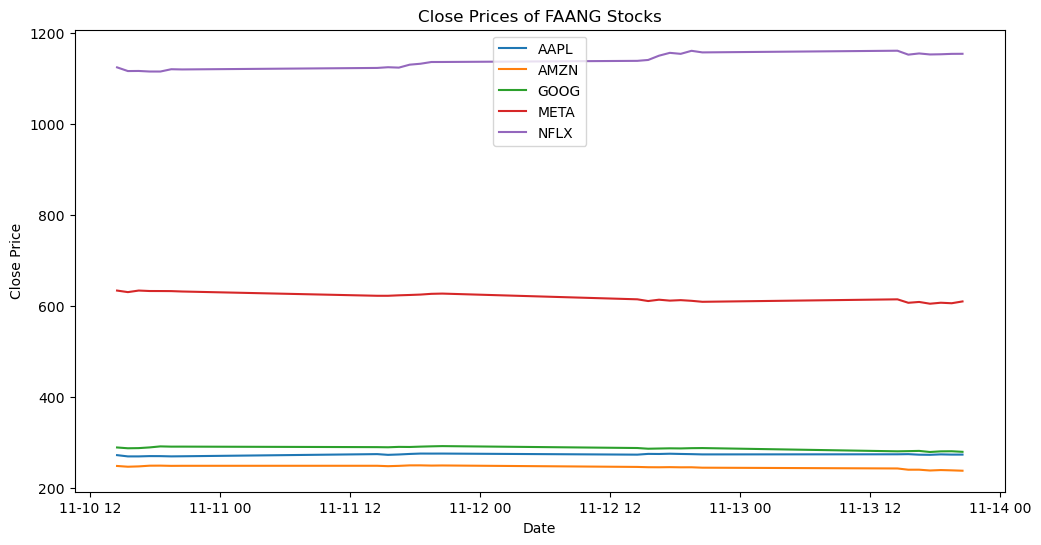

In [8]:
# plot close prices of each stock
plt.figure(figsize=(12,6))
for ticker in df['Close'].columns:
    plt.plot(df['Close'][ticker], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of FAANG Stocks')
plt.legend()
#save plot to plots folder
now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
plt.savefig("plots/" + now + ".png")
plt.show()

## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

[Shebang](https://realpython.com/python-shebang/) is added at the top оf the script and indicates the path to the Python interpreter.
```python
#!/usr/bin/env python3
```


To mark the script [executable](http://realpython.com/run-python-scripts/), I used the following command in the terminal:
```bash
chmod u+x faang.py
```

## Problem 4: Automation

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

A GitHub workflow is an automated process that runs one or more jobs in response to events in a repository. The workflow file is written in YAML syntax and consists of the following key components:
- `name`: This specifies the name of the workflow. In this case, it's "FAANG Data Fetch and Plot".
- `on`: This section defines the events that trigger the workflow. Here, the workflow is set to run on a schedule using cron syntax. The expression `0 9 * * 6` means the workflow will
run at 9:00 AM (UTC) every Saturday. By including `workflow_dispatch` in the `on` section of the workflow file, users can manually trigger the workflow from the GitHub Actions tab in their repository.
- `jobs`: This section contains the jobs that will be executed as part of the workflow.
  - `run-faang-script`: This is the identifier for the job.
    - `runs-on`: This specifies the type of virtual machine to run the job on. Here, it's set to `ubuntu-latest`, which means the job will run on the latest version of Ubuntu.
    - `steps`: This section lists the individual steps that make up the job.
      - `name: Checkout repository`: This step uses the `actions/checkout@v4` action to check out the repository's code into the current GitHub workspace so that it can be accessed by subsequent steps.
      - `name: Set up Python`: This step uses the `actions/setup-python@v5` action to set up a specific version of Python (3.10 in this case) on the runner.
      - `name: Install dependencies`: This step runs a command to install any necessary dependencies using pip. Here, it installs the `yfinance` package and any other dependencies specified in the requirements.txt file.
      - `name: Run FAANG script`: This step runs the `faang.py` script using Python.
        - `name: Commit and push results`: This step uses the `stefanzweifel/git-auto-commit-action@v7` action to automatically commit and push any changes made to the data and plots folders back to the repository. The `commit_message` parameter specifies the message to use for the commit, and the `file_pattern` parameter specifies which files to include in the commit (in this case, all CSV files in the data folder and all PNG files in the plots folder).

Each run provides detailed logs and status information for each step in the workflow, allowing users to monitor the execution and troubleshoot any issues that may arise.
The data and plots generated by the script will be saved in the respective `data` and `plots` folders in the root of the repository. These files can be accessed directly from the repository or downloaded for further analysis.

 It’s common practice and highly encouraged to use existing GitHub Actions in ones workflow files. This practice saves time and effort by leveraging pre-built functionalities. Available actions can be found in the [GitHub Marketplace](https://github.com/marketplace). GitHub has official actions for common tasks, such as [Checkout repository action](https://github.com/marketplace/actions/checkout) and [Set Up Python action](https://github.com/marketplace/actions/setup-python). Many community-contributed actions are available as well.

For more information on GitHub Actions, please visit the documentation [link](https://docs.github.com/en/actions).
Quick start with GitHub Actions [link](https://docs.github.com/en/actions/quickstart).
YouTube tutorial on GitHub Workflow and GitHub Actions [link](https://www.youtube.com/watch?v=Xwpi0ITkL3U).
Another Youtube tutorial on GitHub Actions [link](https://realpython.com/github-actions-python/).
Real Python tutorial on GitHub Actions [link](https://realpython.com/github-actions-python/).




YAML workflow files are stored and defined in a .github/workflows/ folder in project’s root directory. The following is the content of the `faang.yml` file:
```yaml
name: FAANG Data Fetch and Plot
on:
  schedule:
    - cron: '0 9 * * 6'  # Runs every Saturday at 9:00 AM UTC
  workflow_dispatch:      # can be run manually as well
jobs:
  run-faang-script:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout repository
        uses: actions/checkout@v4 # latest version of checkout action

      - name: Set up Python
        uses: actions/setup-python@v5 # latest version of setup-python action
        with:
          python-version: '3.10' # specify python version

      - name: Install dependencies
        run: pip install -r requirements.txt # pip install ensures all packages from requirements.txt file are installed (including yfinance)

      - name: Run FAANG script
        run: python faang.py

      -  name: Commit and push results
         uses: stefanzweifel/git-auto-commit-action@v7
         with:
          commit_message: "Update FAANG data and plots [automated]"
          file_pattern: |
            data/*.csv
            plots/*.png

```



## End